# Creazione Dataset Matematico

## Analisi del Dataset

In [1]:
import  os
from datasets import load_dataset, DatasetDict,concatenate_datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


sns.set(style="whitegrid")


dataset = load_dataset("AI-MO/NuminaMath-1.5")

README.md:   0%|          | 0.00/5.01k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/176M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/160M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/896215 [00:00<?, ? examples/s]

In [2]:
dataset["train"][0]

{'problem': '\nProblem 1. Find all prime numbers $p$ for which there exist positive integers $x, y$ and $z$ such that the number\n\n$$\nx^{p}+y^{p}+z^{p}-x-y-z\n$$\n\nis a product of exactly three distinct prime numbers.\n',
 'solution': "\nSolution. Let $A=x^{p}+y^{p}+z^{p}-x-y-z$. For $p=2$, we take $x=y=4$ and $z=3$. Then $A=30=2 \\cdot 3 \\cdot 5$. For $p=3$ we can take $x=3$ and $y=2$ and $z=1$. Then again $A=30=2 \\cdot 3 \\cdot 5$. For $p=5$ we can take $x=2$ and $y=1$ and $z=1$. Again $A=30=2 \\cdot 3 \\cdot 5$.\n\nAssume now that $p \\geqslant 7$. Working modulo 2 and modulo 3 we see that $A$ is divisible by both 2 and 3. Moreover, by Fermat's Little Theorem, we have\n\n$$\nx^{p}+y^{p}+z^{p}-x-y-z \\equiv x+y+z-x-y-z=0 \\bmod p \\text {. }\n$$\n\nTherefore, by the given condition, we have to solve the equation\n\n$$\nx^{p}+y^{p}+z^{p}-x-y-z=6 p\n$$\n\nIf one of the numbers $x, y$ and $z$ is bigger than or equal to 2 , let's say $x \\geqslant 2$, then\n\n$$\n6 p \\geqslant x^{p

In [3]:
train_data = dataset["train"]

for attributo in train_data.column_names:
    if not (attributo in ['solution','problem','answer']):
        valori_univoci = np.unique(train_data[attributo])
        print(f"I valori per l'attributo {attributo} sono: {valori_univoci}")

I valori per l'attributo problem_type sono: ['Algebra' 'Calculus' 'Combinatorics' 'Geometry' 'Inequalities'
 'Logic and Puzzles' 'NaN' 'Number Theory' 'Other']
I valori per l'attributo question_type sono: ['MCQ' 'NaN' 'math-word-problem' 'other' 'proof']
I valori per l'attributo problem_is_valid sono: ['Incomplete' 'More than one problem' 'NaN' 'Not a problem' 'Yes']
I valori per l'attributo solution_is_valid sono: ['Incomplete' 'NaN' 'Not matched with problem' 'Problem not solved' 'Yes']
I valori per l'attributo source sono: ['amc_aime' 'aops_forum' 'cn_contest' 'cn_k12' 'inequalities' 'metamath'
 'number_theory' 'olympiads' 'olympiads_ref' 'orca_math' 'synthetic_math']
I valori per l'attributo synthetic sono: [False  True]


In [4]:
print(f"Lunghezza iniziale: {len(dataset['train'])}")
dataset = dataset.filter(lambda x: 
        x['problem'] != '' and 
        x['problem'] != 'None' and
        x['problem'] != None and
        x['solution'] != '' and 
        x['solution'] != 'None' and
        x['solution'] != None and
        x['problem_type'] != '' and 
        x['question_type'] != '' and
        x['problem_is_valid'] != '' and
        x['solution_is_valid'] != '' and
        x['source'] != '' and                
        x['synthetic'] != '' and
        x['question_type'] in ['MCQ','math-word-problem','proof'] and 
        (not (x['problem_type'] in ['NaN','Other'])) and
        x['problem_is_valid'] == 'Yes' and
        x['solution_is_valid'] == 'Yes'
    )
print(f"Lunghezza post-filtri: {len(dataset['train'])}")

Lunghezza iniziale: 896215


Filter:   0%|          | 0/896215 [00:00<?, ? examples/s]

Lunghezza post-filtri: 776002


In [5]:
train_data = dataset["train"]

for attributo in train_data.column_names:
    if not (attributo in ['solution','problem','answer']):
        valori_univoci = np.unique(train_data[attributo])
        print(f"I valori per l'attributo {attributo} sono: {valori_univoci}")

I valori per l'attributo problem_type sono: ['Algebra' 'Calculus' 'Combinatorics' 'Geometry' 'Inequalities'
 'Logic and Puzzles' 'Number Theory']
I valori per l'attributo question_type sono: ['MCQ' 'math-word-problem' 'proof']
I valori per l'attributo problem_is_valid sono: ['Yes']
I valori per l'attributo solution_is_valid sono: ['Yes']
I valori per l'attributo source sono: ['amc_aime' 'aops_forum' 'cn_contest' 'cn_k12' 'inequalities' 'metamath'
 'number_theory' 'olympiads' 'olympiads_ref' 'orca_math' 'synthetic_math']
I valori per l'attributo synthetic sono: [False  True]


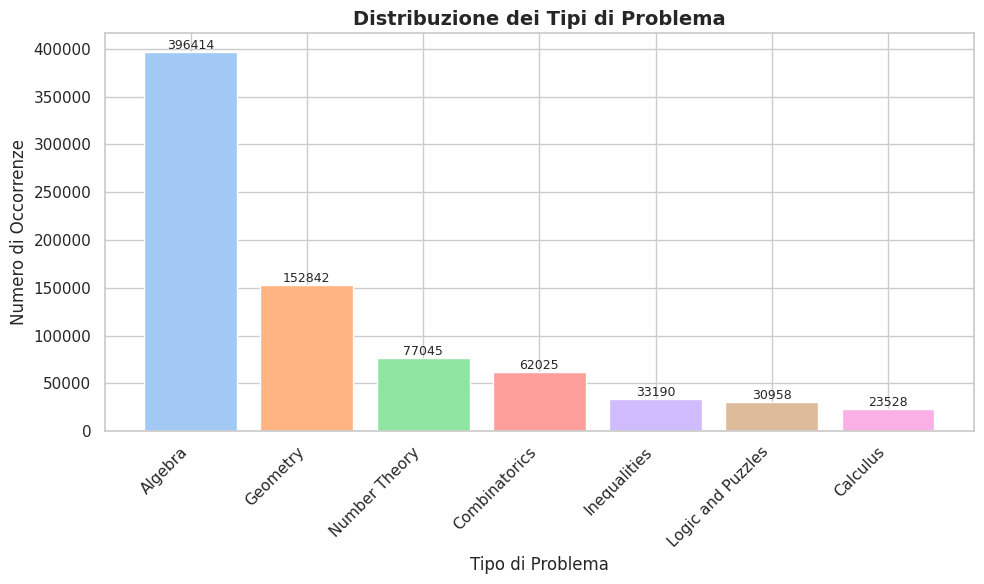

In [6]:
problem_types = dataset['train']['problem_type']
problem_type_counts = {ptype: problem_types.count(ptype) for ptype in set(problem_types)}

sorted_counts = dict(sorted(problem_type_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_counts.keys(), sorted_counts.values(), color=sns.color_palette("pastel"))

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)

plt.xlabel('Tipo di Problema', fontsize=12)
plt.ylabel('Numero di Occorrenze', fontsize=12)
plt.title('Distribuzione dei Tipi di Problema', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

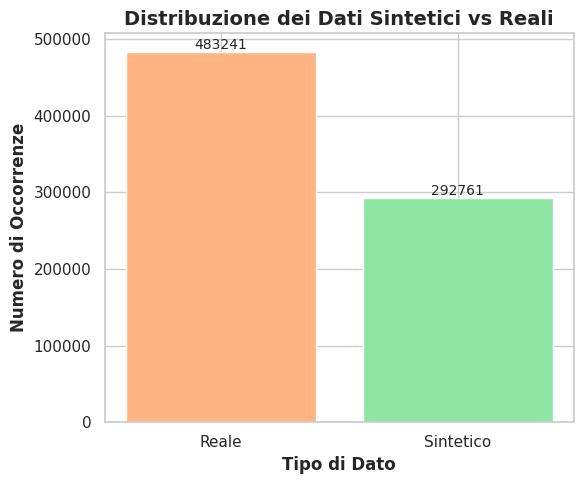

In [7]:
synthetic_counts = {
    True: sum(dataset['train']['synthetic']),
    False: len(dataset['train']) - sum(dataset['train']['synthetic'])
}

labels = ['Reale', 'Sintetico']
values = [synthetic_counts[False], synthetic_counts[True]]

colors = sns.color_palette("pastel")[1:3]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

plt.xlabel('Tipo di Dato', fontsize=12, fontweight='bold')
plt.ylabel('Numero di Occorrenze', fontsize=12, fontweight='bold')
plt.title('Distribuzione dei Dati Sintetici vs Reali', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


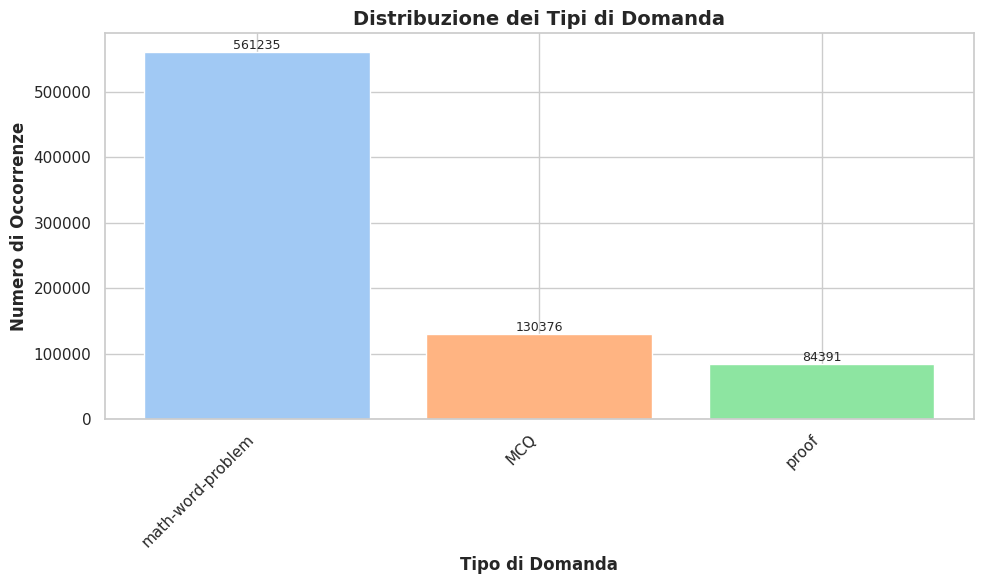

In [8]:
question_type_counts = {
    qtype: dataset['train']['question_type'].count(qtype)
    for qtype in set(dataset['train']['question_type'])
}

sorted_qtypes = dict(sorted(question_type_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", len(sorted_qtypes))
bars = plt.bar(sorted_qtypes.keys(), sorted_qtypes.values(), color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)

plt.xlabel('Tipo di Domanda', fontsize=12, fontweight='bold')
plt.ylabel('Numero di Occorrenze', fontsize=12, fontweight='bold')
plt.title('Distribuzione dei Tipi di Domanda', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


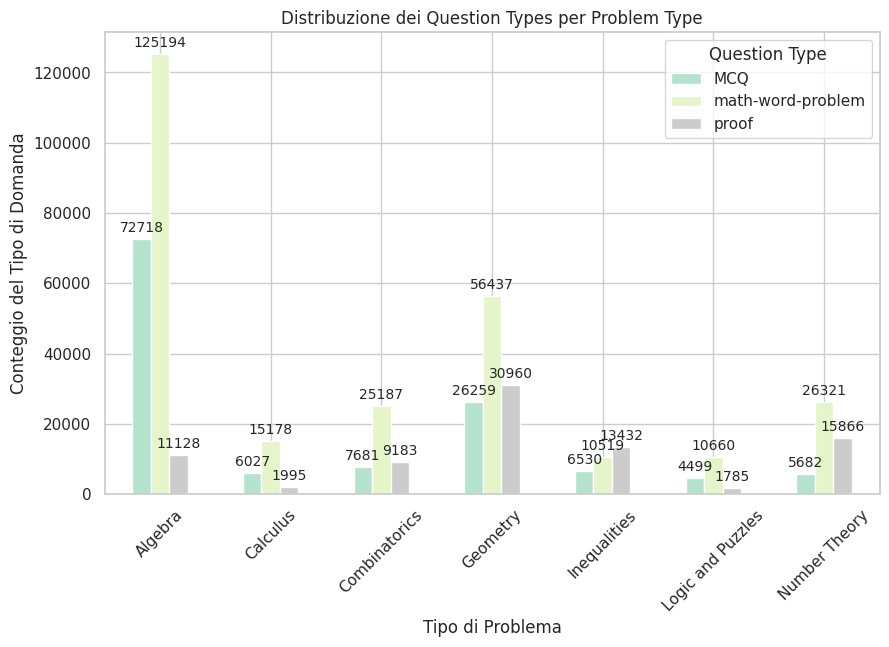

In [9]:
df = pd.DataFrame(dataset['train'])

df = df[df['synthetic'] == False]
distribution = df.groupby('problem_type')['question_type'].value_counts().unstack(fill_value=0)

ax = distribution.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='Pastel2')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.xlabel('Tipo di Problema')
plt.ylabel('Conteggio del Tipo di Domanda')
plt.title('Distribuzione dei Question Types per Problem Type')
plt.xticks(rotation=45)
plt.legend(title='Question Type')

plt.show()

In [10]:
def filter_and_sample(dataset):
    
    dataset = dataset.filter(lambda x:               
        x['synthetic'] != '' and
        x['synthetic'] != True
    )
    
    sampled_data = []

    # Campionamento equo per
    problem_types = ['Algebra', 'Combinatorics', 'Geometry', 'Inequalities', 'Number Theory']
    random.shuffle(problem_types)
    plus_2 = True
    do_check = 0
    for problem_type in problem_types:
        plus_2 = False if do_check > 3 else True
        subset = dataset.filter(lambda x: x['problem_type'] == problem_type)
        question_types = subset.unique('question_type')
        
        for question_type in question_types:
            qt_subset = subset.filter(lambda x: x['question_type'] == question_type)
            sample_size = ((10000 // len(question_types)) + 2) if question_type == 'proof' and plus_2 else (10000 // len(question_types)) 
            sampled_data.append(qt_subset.shuffle(seed=42).select(range(sample_size)))
            
        do_check += 1

    # Campionamento modificato per 
    calculus_logic_types = ['Calculus', 'Logic and Puzzles']
    
    for problem_type in calculus_logic_types:
        if problem_type != calculus_logic_types[1]:
            proof_subset = dataset.filter(lambda x: x['problem_type'] == problem_type and x['question_type'] == 'proof')
            proof_count = len(proof_subset)
            
            sampled_data.append(proof_subset)
    
            remaining_count = max(0, 10000 - proof_count)
            per_category = remaining_count // 2
    
            for qt in ['MCQ', 'math-word-problem']:
                qt_subset = dataset.filter(lambda x: x['problem_type'] == problem_type and x['question_type'] == qt)
                sampled_data.append(qt_subset.shuffle(seed=42).select(range(min(per_category, len(qt_subset)))))  
        else:
            proof_subset = dataset.filter(lambda x: x['problem_type'] == problem_type and x['question_type'] == 'proof')
            proof_count = len(proof_subset)
            
            sampled_data.append(proof_subset.select(range(proof_count-1)))
    
            remaining_count = max(0, 10000 - proof_count)
            per_category = remaining_count // 2
    
            for qt in ['MCQ', 'math-word-problem']:
                qt_subset = dataset.filter(lambda x: x['problem_type'] == problem_type and x['question_type'] == qt)
                sampled_data.append(qt_subset.shuffle(seed=42).select(range(min(per_category, len(qt_subset)))))
                
    final_sampled_data = DatasetDict({"data": sampled_data})
    return final_sampled_data

In [11]:
filtered_and_sampled_data = filter_and_sample(dataset['train'])

Filter:   0%|          | 0/776002 [00:00<?, ? examples/s]

Filter:   0%|          | 0/483241 [00:00<?, ? examples/s]

Flattening the indices:   0%|          | 0/47869 [00:00<?, ? examples/s]

Filter:   0%|          | 0/47869 [00:00<?, ? examples/s]

Filter:   0%|          | 0/47869 [00:00<?, ? examples/s]

Filter:   0%|          | 0/47869 [00:00<?, ? examples/s]

Filter:   0%|          | 0/483241 [00:00<?, ? examples/s]

Flattening the indices:   0%|          | 0/30481 [00:00<?, ? examples/s]

Filter:   0%|          | 0/30481 [00:00<?, ? examples/s]

Filter:   0%|          | 0/30481 [00:00<?, ? examples/s]

Filter:   0%|          | 0/30481 [00:00<?, ? examples/s]

Filter:   0%|          | 0/483241 [00:00<?, ? examples/s]

Flattening the indices:   0%|          | 0/209040 [00:00<?, ? examples/s]

Filter:   0%|          | 0/209040 [00:00<?, ? examples/s]

Filter:   0%|          | 0/209040 [00:00<?, ? examples/s]

Filter:   0%|          | 0/209040 [00:00<?, ? examples/s]

Filter:   0%|          | 0/483241 [00:00<?, ? examples/s]

Flattening the indices:   0%|          | 0/113656 [00:00<?, ? examples/s]

Filter:   0%|          | 0/113656 [00:00<?, ? examples/s]

Filter:   0%|          | 0/113656 [00:00<?, ? examples/s]

Filter:   0%|          | 0/113656 [00:00<?, ? examples/s]

Filter:   0%|          | 0/483241 [00:00<?, ? examples/s]

Flattening the indices:   0%|          | 0/42051 [00:00<?, ? examples/s]

Filter:   0%|          | 0/42051 [00:00<?, ? examples/s]

Filter:   0%|          | 0/42051 [00:00<?, ? examples/s]

Filter:   0%|          | 0/42051 [00:00<?, ? examples/s]

Filter:   0%|          | 0/483241 [00:00<?, ? examples/s]

Filter:   0%|          | 0/483241 [00:00<?, ? examples/s]

Filter:   0%|          | 0/483241 [00:00<?, ? examples/s]

Filter:   0%|          | 0/483241 [00:00<?, ? examples/s]

Filter:   0%|          | 0/483241 [00:00<?, ? examples/s]

Filter:   0%|          | 0/483241 [00:00<?, ? examples/s]

In [12]:
filtered_and_sampled_data

DatasetDict({
    data: [Dataset({
        features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic'],
        num_rows: 3333
    }), Dataset({
        features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic'],
        num_rows: 3335
    }), Dataset({
        features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic'],
        num_rows: 3333
    }), Dataset({
        features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic'],
        num_rows: 3335
    }), Dataset({
        features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic'],
        num_rows: 3333
    }), Dataset({
        fe

In [13]:
all_data = concatenate_datasets(filtered_and_sampled_data["data"])

final_dataset_dict = DatasetDict({
    "data": all_data
})

final_dataset_dict

DatasetDict({
    data: Dataset({
        features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic'],
        num_rows: 70000
    })
})

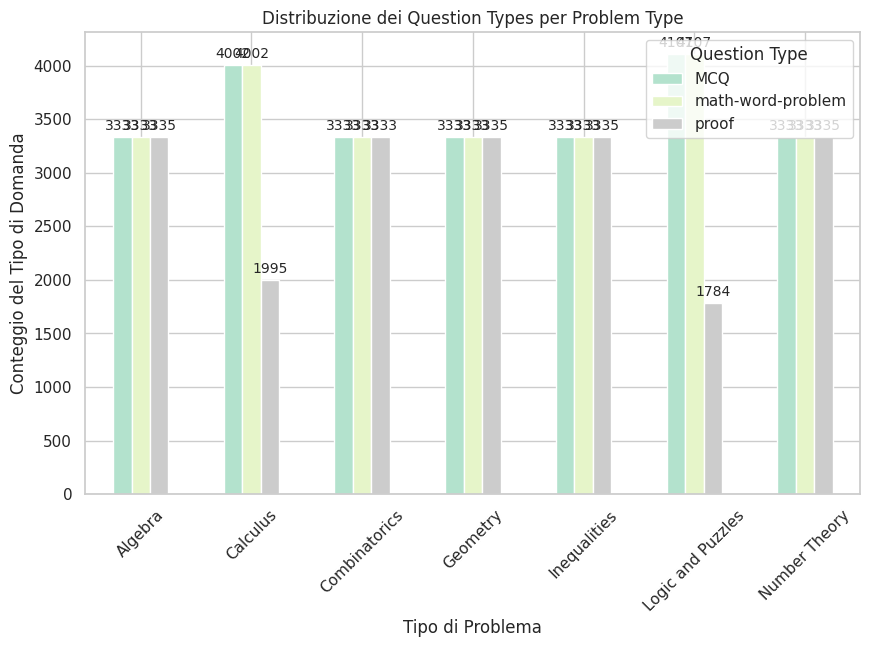

In [14]:
df = pd.DataFrame(final_dataset_dict['data'])

distribution = df.groupby('problem_type')['question_type'].value_counts().unstack(fill_value=0)

ax = distribution.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='Pastel2')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.xlabel('Tipo di Problema')
plt.ylabel('Conteggio del Tipo di Domanda')
plt.title('Distribuzione dei Question Types per Problem Type')
plt.xticks(rotation=45)
plt.legend(title='Question Type')

plt.show()

In [15]:
a = 3333 
b = 4002
c = 1995
d = 4107 
e = 1784

print(
    (a*10)+
    ((a+2)*4)+
    (a*1)+
    (b*2)+
    (c)+
    (d*2)
    +e
)

70000


## SPLITTING DEL DATASET

In [16]:
for split_name, dataset in final_dataset_dict.items():

    df = dataset.to_pandas()
    
    df.to_parquet(f'dataset_{split_name}.parquet')

    print(f"{split_name} salvato come Parquet.")

data salvato come Parquet.


In [17]:
df = pd.read_parquet('/kaggle/working/dataset_data.parquet')
df[df['solution']=='None']

,problem,solution,answer,problem_type,question_type,problem_is_valid,solution_is_valid,source,synthetic


In [18]:
total = len(df)
non_null_solution = df["solution"].notnull().sum()
total-non_null_solution

0

In [19]:
os.makedirs("/kaggle/working/dataset", exist_ok=True)

In [20]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

datasets = []

for i, (train_index, test_index) in enumerate(kf.split(df, df['problem_type']), 1):
    dataset = df.iloc[test_index]
    datasets.append(dataset)
    print(f"Dataset {i}:")
    print(dataset['problem_type'].value_counts())
    print("\n")

    # 3. Salvataggio dei dataset in formato Parquet
    dataset.to_parquet(f"/kaggle/working/dataset/dataset_{i}.parquet", index=False)
    print(f"Dataset {i} salvato in formato Parquet!\n")


Dataset 1:
problem_type
Number Theory        2501
Inequalities         2500
Algebra              2500
Geometry             2500
Combinatorics        2500
Calculus             2500
Logic and Puzzles    2499
Name: count, dtype: int64


Dataset 1 salvato in formato Parquet!

Dataset 2:
problem_type
Inequalities         2501
Number Theory        2500
Algebra              2500
Geometry             2500
Combinatorics        2500
Calculus             2500
Logic and Puzzles    2499
Name: count, dtype: int64


Dataset 2 salvato in formato Parquet!

Dataset 3:
problem_type
Algebra              2501
Number Theory        2500
Inequalities         2500
Geometry             2500
Combinatorics        2500
Logic and Puzzles    2500
Calculus             2499
Name: count, dtype: int64


Dataset 3 salvato in formato Parquet!

Dataset 4:
problem_type
Geometry             2501
Number Theory        2500
Inequalities         2500
Algebra              2500
Calculus             2500
Logic and Puzzles    2500
C